In [14]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import wfdb

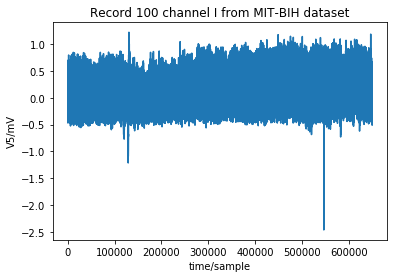

In [15]:
# read a wfdb record and plot the signal
record = wfdb.rdrecord('100', sampfrom=0, sampto='end', channels=[1], pb_dir='mitdb')
wfdb.plot_wfdb(record=record, title='Record 100 channel I from MIT-BIH dataset')

In [16]:
# Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('100', sampfrom=0, sampto='end', channels=[1], pb_dir='mitdb')
display(signals)
display(fields)

array([[-0.065],
       [-0.065],
       [-0.065],
       ..., 
       [-0.365],
       [-0.335],
       [ 0.   ]])

{'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'fs': 360,
 'n_sig': 1,
 'sig_len': 650000,
 'sig_name': ['V5'],
 'units': ['mV']}

In [17]:
# check data shape
signals.shape

(650000, 1)

In [18]:
# check data type
signals.dtype

dtype('float64')

In [19]:
# Read a WFDB annotation file into a wfdb.Annotation object, and plot the samples
annotation = wfdb.rdann('100', 'atr', sampfrom=0, sampto=None, shift_samps=True, pb_dir='mitdb')
annotation.fs = 360

In [20]:
# "sample" method returns a numpy array containing the annotation locations in samples
# relative to the beginning of the record
annotation.sample

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [21]:
# check data shape
annotation.sample.shape

(2274,)

In [22]:
# check list length
len(annotation.symbol)

2274

In [23]:
# unique symbols in the symbol list
# + means Rhythm change
# 'A' means Atrial premature beat
# 'N' means Normal beat
# 'V' means Premature ventricular contraction

from collections import Counter
Counter(annotation.symbol).keys()

dict_keys(['+', 'N', 'A', 'V'])

In [24]:
# how many of each symbol in the list
# there are 2239 normal beats, 33 atrial premature beats and 1 PVC beat
# in the "100" record of MIT-BIH database

Counter(annotation.symbol).values()

dict_values([1, 2239, 33, 1])

In [25]:
# siddhant code below from corrupted file

In [26]:
 #" Splitting in 10 seconds interval the base data\n",
    
    #"# Now 650,000 data point corresponds to 180.55 10s second interval;\n",
    #"# so in the first part let us create a list of array of 180 10s intervals and then add the last array data points \n",
    #"# i.e data points corresonding to the .55 \n",
    
nos = (len(signals)/(annotation.fs*10))
nosi = int(nos)
#print(nos)
#print(nosi)
    
final = list()
    
for i in range(nosi):
    b = signals[(i*3600):(i*3600 + 3600)]
        
    newdata = list()
    for j in range(3600):
        temp = b[j][0]
        newdata = np.append(newdata,temp)
        d = np.asarray(newdata)
        e = np.array_split(d,1)
#print(type(e))\n",
    final = final + e
    
print(final)
print(len(final))
   
    
# the last 0.55 part\n",
f = signals[(nosi*3600):]
#print(len(f))\n",
    
newdata2 = list()
    
for i in range(len(f)):
    temp = b[i][0]
    newdata2 = np.append(newdata2,temp)
    
h = np.array_split(newdata2,1)
#print(type(h))\n",
   
    
# the final is the total \n",
final = final + h

print("final number of rows:",len(final))
   
  

[array([-0.065, -0.065, -0.065, ..., -0.295, -0.29 , -0.285]), array([-0.275, -0.265, -0.285, ..., -0.4  , -0.42 , -0.4  ]), array([-0.39 , -0.395, -0.39 , ..., -0.305, -0.3  , -0.3  ]), array([-0.28 , -0.285, -0.29 , ..., -0.065, -0.08 , -0.075]), array([-0.075, -0.06 , -0.07 , ..., -0.335, -0.355, -0.335]), array([-0.32 , -0.32 , -0.33 , ..., -0.175, -0.18 , -0.175]), array([-0.17 , -0.16 , -0.17 , ...,  0.4  ,  0.035, -0.275]), array([-0.37 , -0.315, -0.29 , ..., -0.33 , -0.35 , -0.355]), array([-0.36 , -0.36 , -0.355, ..., -0.29 , -0.305, -0.31 ]), array([-0.305, -0.31 , -0.295, ..., -0.145, -0.155, -0.165]), array([-0.195, -0.23 , -0.245, ..., -0.17 , -0.16 , -0.15 ]), array([-0.175, -0.18 , -0.17 , ..., -0.265, -0.255, -0.255]), array([-0.255, -0.265, -0.28 , ..., -0.295, -0.295, -0.285]), array([-0.285, -0.3  , -0.305, ..., -0.24 , -0.25 , -0.235]), array([-0.24 , -0.24 , -0.245, ..., -0.305, -0.31 , -0.305]), array([-0.3  , -0.295, -0.3  , ..., -0.27 , -0.31 , -0.335]), array([

In [20]:
# to create a list of 181 rows, that will be 0 or 1 as per whether a 10 s has PVC or not\n",
   
loc = list()
for i in range(len(annotation.symbol)):
    if annotation.symbol[i] == 'V':
        loc = np.append(loc,annotation.sample[i])
print(loc)
   
rowloc = list()

for i in range(len(loc)):
    rowloc = np.append(rowloc,(int(loc[i]/3600)))

print(rowloc)
   
pvc = np.zeros(nosi+1)
    
for i in range(len(rowloc)):
    temp = int(rowloc[i])
    pvc[temp] = 1
print(pvc)
# now to cross check pvc list\n",
    
print(len(pvc))
    
for i in range(len(pvc)):
    if pvc[i] == 1:
        print('the location in pvc list is in the :',i,' 10 secondth record ')
       
 

[ 546792.]
[ 151.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
181
the location in pvc list is in the : 151  10 secondth record 


In [30]:
# Finding normal beats

locn = list()
for i in range(len(annotation.symbol)):
    if annotation.symbol[i] == 'N':
        locn = np.append(locn,annotation.sample[i])
print(len(locn))
   

    
    
def window10sec (signals, annotation):
    """
    this function gives a 10-seconds window (5s before, 5s after the annotation mark)
    of the ECG signals and assign value 1 if it's PVC beat and 0 otherwise
    parameter: signals: numpy array containing heart beat record values
               annotation: wfdb.annotation object containing heart beat annotations
    return: two lists
            siglist: a list of lists of length 3600 
            annlist: a list containing 1 if PVC beat, 0 otherwise
    """
    siglist = []
    annlist = []
    
    #loop through the annotation.symbol list
    for i in range(len(annotation.symbol)):
        timestamp = annotation.sample[i] #get the timestamp
        
        #test if that timestamp can have 5 seconds before and after window
        windowStart = timestamp - 5*annotation.fs
        windowEnd = timestamp + 5*annotation.fs
        if windowStart >= 0 & windowEnd <= len(signals):
            if annotation.symbol[i] == 'V':
                siglist.append(signals[windowStart:windowEnd,].flatten().tolist())
                annlist.append(1)
            elif annotation.symbol[i] == 'N':
                siglist.append(signals[windowStart:windowEnd,].flatten().tolist())
                annlist.append(0)
        else:
            continue
    
    return siglist, annlist
    

2239


In [31]:
# taken from Yuntao code
# check every MIT-BIH data record to identify the type and number of annotations
# get all the record names in a list
namelist = []
namelist = namelist + list(range(100,125,1)) + list(range(200,235,1))
for num in [110,120,204,206,211,216,218,224,225,226,227,229]:
    namelist.remove(num)

len(namelist)

48

In [32]:
# Modified from yuntao code for single classification into Normal and PVC beats
# loop through all record to get all the 10-seconds window signal list and annotation list
# this could be the training dataset for the neural network model
# this takes minutes to run

ECG_signals = []
PVC_annotations = []

for record in namelist:
    signals, fields = wfdb.rdsamp(str(record), sampfrom=0, sampto='end', channels=[1], pb_dir='mitdb')
    annotation = wfdb.rdann(str(record), 'atr', sampfrom=0, sampto=None, shift_samps=True, pb_dir='mitdb')
    
    signal_list, annotation_list = window10sec(signals, annotation)
    ECG_signals = ECG_signals + signal_list
    PVC_annotations = PVC_annotations + annotation_list

In [35]:
print(len(ECG_signals))
print(len(PVC_annotations))

81960
81960


In [36]:
# there are 7112 PVC 10-seconds window, 74848 normal 10-seconds window
Counter(PVC_annotations)

Counter({0: 74848, 1: 7112})

In [39]:
# now classifying all the datasets as per three classes : Atrial premature beat, Normal beat and PVC 

def window10sec2 (signals, annotation):
    """
    this function gives a 10-seconds window (5s before, 5s after the annotation mark)
    of the ECG signals and assign value 1 if it's PVC beat and 0 otherwise
    parameter: signals: numpy array containing heart beat record values
               annotation: wfdb.annotation object containing heart beat annotations
    return: two lists
            siglist: a list of lists of length 3600 
            annlist: a list containing 1 if PVC beat, 0 otherwise
    """
    siglist = []
    annlist = []
    
    #loop through the annotation.symbol list
    for i in range(len(annotation.symbol)):
        timestamp = annotation.sample[i] #get the timestamp
        
        #test if that timestamp can have 5 seconds before and after window
        windowStart = timestamp - 5*annotation.fs
        windowEnd = timestamp + 5*annotation.fs
        if windowStart >= 0 & windowEnd <= len(signals):
            if annotation.symbol[i] == 'V':
                siglist.append(signals[windowStart:windowEnd,].flatten().tolist())
                annlist.append(1)
            elif annotation.symbol[i] == 'N':
                siglist.append(signals[windowStart:windowEnd,].flatten().tolist())
                annlist.append(0)
            
            elif annotation.symbol[i] == 'A':
                siglist.append(signals[windowStart:windowEnd,].flatten().tolist())
                annlist.append(2)
        else:
            continue
    
    return siglist, annlist




In [40]:
# Modified from yuntao code for single classification into Normal, PVC beats, and Atrial classificaiton beat
# loop through all record to get all the 10-seconds window signal list and annotation list
# this could be the training dataset for the neural network model
# this takes minutes to run

ECG_signals2 = []
PVC_annotations2 = []

for record in namelist:
    signals, fields = wfdb.rdsamp(str(record), sampfrom=0, sampto='end', channels=[1], pb_dir='mitdb')
    annotation = wfdb.rdann(str(record), 'atr', sampfrom=0, sampto=None, shift_samps=True, pb_dir='mitdb')
    
    signal_list, annotation_list = window10sec2(signals, annotation)
    ECG_signals2 = ECG_signals2 + signal_list
    PVC_annotations2 = PVC_annotations2 + annotation_list

In [41]:
print(len(ECG_signals2))
print(len(PVC_annotations2))


Counter(PVC_annotations2)

84504
84504


Counter({0: 74848, 1: 7112, 2: 2544})